Block (0.00-0.10, 0.00-0.10):
	Range: -0.07 - 0.18
	Height Range: 0.25
Block (0.00-0.10, 0.10-0.20):
	Range: -0.07 - -0.02
	Height Range: 0.05
Block (0.00-0.10, 0.20-0.30):
	Range: -0.03 - 0.26
	Height Range: 0.30
Block (0.00-0.10, 0.30-0.40):
	Range: 0.26 - 0.30
	Height Range: 0.03
Block (0.00-0.10, 0.40-0.50):
	Range: 0.22 - 0.30
	Height Range: 0.08
Block (0.00-0.10, 0.50-0.60):
	Range: 0.06 - 0.33
	Height Range: 0.27
Block (0.00-0.10, 0.60-0.70):
	Range: 0.00 - 0.31
	Height Range: 0.31
Block (0.00-0.10, 0.70-0.80):
	Range: 0.10 - 0.35
	Height Range: 0.25
Block (0.00-0.10, 0.80-0.90):
	Range: 0.20 - 0.27
	Height Range: 0.07
Block (0.00-0.10, 0.90-1.00):
	Range: 0.23 - 0.25
	Height Range: 0.02
Block (0.00-0.10, 1.00-1.10):
	Range: 0.15 - 0.23
	Height Range: 0.08
Block (0.00-0.10, 1.10-1.20):
	Range: 0.16 - 0.28
	Height Range: 0.11
Block (0.00-0.10, 1.20-1.30):
	Range: 0.07 - 0.31
	Height Range: 0.25
Block (0.00-0.10, 1.30-1.40):
	Range: 0.06 - 0.28
	Height Range: 0.22
Block (0.00-0.10

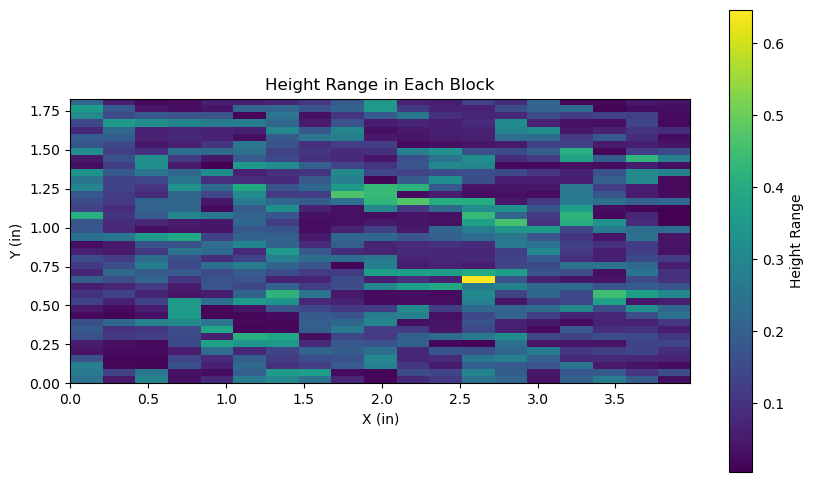

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv("a240402b.csv")

# Define the size of the square blocks (adjust as needed)
block_size = 0.1  # Define the size of each square block

# Extract the X, Y, and Z columns
X_values = df['X (in)']
Y_values = df['Y (in)']
Z_values = df['Z (in)']

# Calculate the number of blocks in each direction
num_blocks_x = int(np.ceil((X_values.max() - X_values.min()) / block_size))
num_blocks_y = int(np.ceil((Y_values.max() - Y_values.min()) / block_size))

# Initialize arrays to store max and min heights for each block
max_heights = np.zeros((num_blocks_x, num_blocks_y))
min_heights = np.zeros((num_blocks_x, num_blocks_y))
height_ranges = np.zeros((num_blocks_x, num_blocks_y))

# Print the ranges in an array format and calculate max and min heights for each block
for i in range(num_blocks_x):
    for j in range(num_blocks_y):
        # Define the boundaries of the current block
        x_min = X_values.min() + i * block_size
        x_max = X_values.min() + (i + 1) * block_size
        y_min = Y_values.min() + j * block_size
        y_max = Y_values.min() + (j + 1) * block_size
        
        # Get Z values within the current block
        z_block = Z_values[(X_values >= x_min) & (X_values < x_max) & (Y_values >= y_min) & (Y_values < y_max)]
        
        # Calculate max and min heights within the block
        if len(z_block) > 0:
            max_heights[i, j] = np.max(z_block)
            min_heights[i, j] = np.min(z_block)
            height_ranges[i, j] = np.max(z_block) - np.min(z_block)
        
        # Print the range information for each block
        print(f"Block ({x_min:.2f}-{x_max:.2f}, {y_min:.2f}-{y_max:.2f}):")
        print(f"\tRange: {min_heights[i, j]:.2f} - {max_heights[i, j]:.2f}")
        print(f"\tHeight Range: {height_ranges[i, j]:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(height_ranges, extent=[X_values.min(), X_values.max(), Y_values.min(), Y_values.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Height Range')
plt.xlabel('X (in)')
plt.ylabel('Y (in)')
plt.title('Height Range in Each Block')
plt.show()


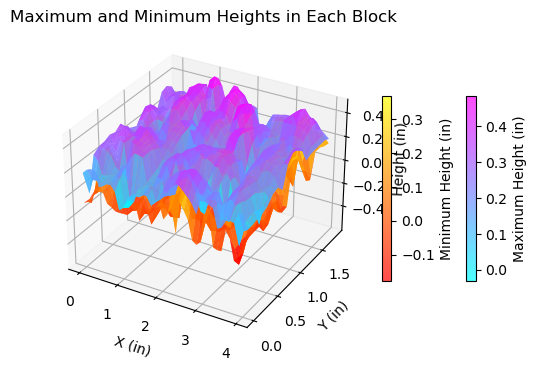

In [39]:
# Create meshgrid for X and Y
X_mesh, Y_mesh = np.meshgrid(np.linspace(X_values.min(), X_values.max(), num_blocks_x),
                              np.linspace(Y_values.min(), Y_values.max(), num_blocks_y))

# Plot the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface for maximum heights
ax.plot_surface(X_mesh, Y_mesh, max_heights.T, cmap='cool', alpha=0.7)

# Plot surface for minimum heights
ax.plot_surface(X_mesh, Y_mesh, min_heights.T, cmap='autumn', alpha=0.7)

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Height (in)')
ax.set_title('Maximum and Minimum Heights in Each Block')

# Add colorbars for max and min heights
cbar_max = plt.colorbar(ax.plot_surface(X_mesh, Y_mesh, max_heights.T, cmap='cool', alpha=0.7), ax=ax, shrink=0.5)
cbar_max.set_label('Maximum Height (in)')
cbar_min = plt.colorbar(ax.plot_surface(X_mesh, Y_mesh, min_heights.T, cmap='autumn', alpha=0.7), ax=ax, shrink=0.5)
cbar_min.set_label('Minimum Height (in)')

plt.show()

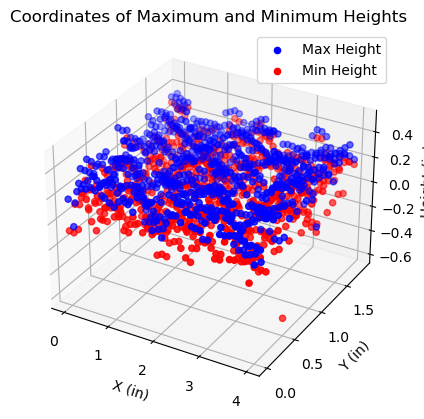

In [40]:
# Create meshgrid for X and Y
X_mesh, Y_mesh = np.meshgrid(np.linspace(X_values.min(), X_values.max(), num_blocks_x),
                              np.linspace(Y_values.min(), Y_values.max(), num_blocks_y))

# Plot the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points for maximum heights
ax.scatter(X_mesh.flatten(), Y_mesh.flatten(), max_heights.flatten(), c='blue', label='Max Height')

# Plot points for minimum heights
ax.scatter(X_mesh.flatten(), Y_mesh.flatten(), min_heights.flatten(), c='red', label='Min Height')

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Height (in)')
ax.set_title('Coordinates of Maximum and Minimum Heights')

# Add legend
ax.legend()

plt.show()


In [41]:
len(max_heights)

40

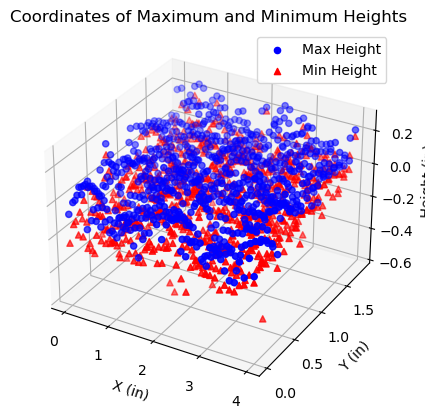

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV data
df = pd.read_csv("a240402k.csv")

# Define the size of the square blocks (adjust as needed)
block_size = 0.1  # Define the size of each square block

# Extract the X, Y, and Z columns
X_values = df['X (in)']
Y_values = df['Y (in)']
Z_values = df['Z (in)']

# Calculate the number of blocks in each direction
num_blocks_x = int(np.ceil((X_values.max() - X_values.min()) / block_size))
num_blocks_y = int(np.ceil((Y_values.max() - Y_values.min()) / block_size))

# Initialize arrays to store max and min heights for each block
max_heights = np.zeros((num_blocks_x, num_blocks_y))
min_heights = np.zeros((num_blocks_x, num_blocks_y))

# Iterate over each block and calculate max and min heights
for i in range(num_blocks_x):
    for j in range(num_blocks_y):
        # Define the boundaries of the current block
        x_min = X_values.min() + i * block_size
        x_max = X_values.min() + (i + 1) * block_size
        y_min = Y_values.min() + j * block_size
        y_max = Y_values.min() + (j + 1) * block_size
        
        # Get Z values within the current block
        z_block = Z_values[(X_values >= x_min) & (X_values < x_max) & (Y_values >= y_min) & (Y_values < y_max)]
        
        # Calculate max and min heights within the block
        if len(z_block) > 0:
            max_heights[i, j] = np.max(z_block)
            min_heights[i, j] = np.min(z_block)

# Create meshgrid for X and Y
X_mesh, Y_mesh = np.meshgrid(np.linspace(X_values.min(), X_values.max(), num_blocks_x),
                              np.linspace(Y_values.min(), Y_values.max(), num_blocks_y))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points for maximum heights
ax.scatter(X_mesh.flatten(), Y_mesh.flatten(), max_heights.flatten(), c='blue', label='Max Height', marker='o')

# Plot points for minimum heights
ax.scatter(X_mesh.flatten(), Y_mesh.flatten(), min_heights.flatten(), c='red', label='Min Height', marker='^')

# Set labels and title
ax.set_xlabel('X (in)')
ax.set_ylabel('Y (in)')
ax.set_zlabel('Height (in)')
ax.set_title('Coordinates of Maximum and Minimum Heights')

# Add legend
ax.legend()

plt.show()


In [28]:
import cv2
import pandas as pd

# Load the image
image_file = "Segmented_image_2.png"
image = cv2.imread(image_file)

# Read the Excel file
excel_file = "a240402k.csv"
df = pd.read_csv(excel_file)

# Extract X and Y coordinates from the Excel file
X_coordinates = df['X (in)']
Y_coordinates = df['Y (in)']

# Iterate over each coordinate pair and extract the corresponding segment from the image
segments = []
for x, y in zip(X_coordinates, Y_coordinates):
    # Since OpenCV images are indexed as (row, column), we need to swap x and y
    segment = image[int(y), int(x)]  # Extract segment at coordinate (x, y) from the image
    segments.append(segment)

# Display the extracted segments (for demonstration)
for i, segment in enumerate(segments, 1):
    cv2.imshow(f"Segment {i}", segment)

cv2.waitKey(0)
cv2.destroyAllWindows()


KeyboardInterrupt: 